<a href="https://colab.research.google.com/github/ricardoandreom/Football-Data-Analysis/blob/main/xThreat_Passes_%26_Passing_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [76]:
df = pd.read_excel('/content/Palmeiras 2 Flamengo 1 (passes).xlsx')
df.head()

,Passador,x,y,Recetor,x_end,y_end,Passes,Team
0,21. Weverton,10.5,31.8,22. J. Piquerez,40.30,55.1,7,Palmeiras
1,21. Weverton,10.5,31.8,12. Mayke,37.85,8.3,4,Palmeiras
2,21. Weverton,10.5,31.8,15. G. Gomez,33.10,16.0,8,Palmeiras
3,21. Weverton,10.5,31.8,8. Ze Rafael,45.30,36.6,1,Palmeiras
4,21. Weverton,10.5,31.8,23. R. Veiga,60.30,48.6,1,Palmeiras


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Passador  156 non-null    object 
 1   x         156 non-null    float64
 2   y         156 non-null    float64
 3   Recetor   156 non-null    object 
 4   x_end     156 non-null    float64
 5   y_end     156 non-null    float64
 6   Passes    156 non-null    int64  
 7   Team      156 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 9.9+ KB


In [18]:
xT = pd.read_csv("xTgrid.csv")
xT.head()

,0.00638303,0.00779616,0.00844854,0.00977659,0.01126267,0.01248344,0.01473596,0.0174506,0.02122129,0.02756312,0.03485072,0.0379259
0,0.007501,0.008786,0.009424,0.010595,0.012147,0.013845,0.016118,0.018703,0.024015,0.029533,0.040670,0.046477
1,0.008880,0.009777,0.010013,0.011105,0.012692,0.014291,0.016856,0.019351,0.024122,0.028552,0.054911,0.064426
2,0.009411,0.010827,0.010165,0.011324,0.012626,0.014846,0.016895,0.019971,0.023851,0.035113,0.108051,0.257454
3,0.009411,0.010827,0.010165,0.011324,0.012626,0.014846,0.016895,0.019971,0.023851,0.035113,0.108051,0.257454
4,0.008880,0.009777,0.010013,0.011105,0.012692,0.014291,0.016856,0.019351,0.024122,0.028552,0.054911,0.064426


In [19]:
xT = pd.read_csv("xTgrid.csv", header=None)
xT.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.006383,0.007796,0.008449,0.009777,0.011263,0.012483,0.014736,0.017451,0.021221,0.027563,0.034851,0.037926
1,0.007501,0.008786,0.009424,0.010595,0.012147,0.013845,0.016118,0.018703,0.024015,0.029533,0.040670,0.046477
2,0.008880,0.009777,0.010013,0.011105,0.012692,0.014291,0.016856,0.019351,0.024122,0.028552,0.054911,0.064426
3,0.009411,0.010827,0.010165,0.011324,0.012626,0.014846,0.016895,0.019971,0.023851,0.035113,0.108051,0.257454
4,0.009411,0.010827,0.010165,0.011324,0.012626,0.014846,0.016895,0.019971,0.023851,0.035113,0.108051,0.257454


In [20]:
#After importing xT Grid, turn it into an array, and then get how many rows and columns it has

xT = np.array(xT)
xT_rows, xT_cols = xT.shape

In [21]:
xT

array([[0.00638303, 0.00779616, 0.00844854, 0.00977659, 0.01126267,
        0.01248344, 0.01473596, 0.0174506 , 0.02122129, 0.02756312,
        0.03485072, 0.0379259 ],
       [0.00750072, 0.00878589, 0.00942382, 0.0105949 , 0.01214719,
        0.0138454 , 0.01611813, 0.01870347, 0.02401521, 0.02953272,
        0.04066992, 0.04647721],
       [0.0088799 , 0.00977745, 0.01001304, 0.01110462, 0.01269174,
        0.01429128, 0.01685596, 0.01935132, 0.0241224 , 0.02855202,
        0.05491138, 0.06442595],
       [0.00941056, 0.01082722, 0.01016549, 0.01132376, 0.01262646,
        0.01484598, 0.01689528, 0.0199707 , 0.02385149, 0.03511326,
        0.10805102, 0.25745362],
       [0.00941056, 0.01082722, 0.01016549, 0.01132376, 0.01262646,
        0.01484598, 0.01689528, 0.0199707 , 0.02385149, 0.03511326,
        0.10805102, 0.25745362],
       [0.0088799 , 0.00977745, 0.01001304, 0.01110462, 0.01269174,
        0.01429128, 0.01685596, 0.01935132, 0.0241224 , 0.02855202,
        0.05491138,

In [22]:
print(xT_rows,xT_cols)

8 12


In [23]:
df['x1_bin'] = pd.cut(df['x'], bins=xT_cols, labels=False)
df['y1_bin'] = pd.cut(df['y'], bins=xT_rows, labels=False)
df['x2_bin'] = pd.cut(df['x_end'], bins=xT_cols, labels=False)
df['y2_bin'] = pd.cut(df['y_end'], bins=xT_rows, labels=False)

In [24]:
df['start_zone_value'] = df[['x1_bin', 'y1_bin']].apply(lambda x: xT[x[1]][x[0]], axis=1)
df['end_zone_value'] = df[['x2_bin', 'y2_bin']].apply(lambda x: xT[x[1]][x[0]], axis=1)

In [25]:
df['xT'] = df['end_zone_value'] - df['start_zone_value']

In [30]:
df_teamA = df[df['Team']=='Palmeiras']
df_teamB = df[df['Team']=='Flamengo']

In [29]:
df.groupby(['Passador']).sum()[['Passes','start_zone_value','end_zone_value','xT']].sort_values(by=['xT'], ascending=False)

,Passes,start_zone_value,end_zone_value,xT
Passador,,,,
16. Filipe Luis,22,0.122154,0.433463,0.311309
23. D. Luiz,56,0.134848,0.443468,0.308621
44. Isla,31,0.139605,0.423960,0.284355
5. W. Arao,68,0.174162,0.439510,0.265348
18. A. Pereira,57,0.241224,0.481216,0.239992
7. E. Ribeiro,29,0.192942,0.426791,0.233850
27. B. Henrique,7,0.232386,0.381501,0.149115
3. R. Caio,77,0.128622,0.233593,0.104972
21. Weverton,28,0.065874,0.138948,0.073074


In [36]:
df_teamA.groupby(['Passador']).sum()[['Passes','start_zone_value','end_zone_value','xT']].sort_values(by=['xT'], ascending=False)

,Passes,start_zone_value,end_zone_value,xT
Passador,,,,
21. Weverton,28,0.065874,0.138948,0.073074
12. Mayke,25,0.090101,0.153925,0.063824
15. G. Gomez,26,0.063569,0.115732,0.052162
22. J. Piquerez,30,0.096918,0.127286,0.030368
8. Ze Rafael,29,0.133614,0.162218,0.028604
13. Luan,14,0.067943,0.092028,0.024085
28. Danilo,18,0.154811,0.162989,0.008178
23. R. Veiga,11,0.144091,0.139989,-0.004102
7. Rony,10,0.147664,0.099846,-0.047817


In [37]:
df_teamB.groupby(['Passador']).sum()[['Passes','start_zone_value','end_zone_value','xT']].sort_values(by=['xT'], ascending=False)

,Passes,start_zone_value,end_zone_value,xT
Passador,,,,
16. Filipe Luis,22,0.122154,0.433463,0.311309
23. D. Luiz,56,0.134848,0.443468,0.308621
44. Isla,31,0.139605,0.423960,0.284355
5. W. Arao,68,0.174162,0.439510,0.265348
18. A. Pereira,57,0.241224,0.481216,0.239992
7. E. Ribeiro,29,0.192942,0.426791,0.233850
27. B. Henrique,7,0.232386,0.381501,0.149115
3. R. Caio,77,0.128622,0.233593,0.104972
1. Diego Alves,21,0.037642,0.067949,0.030307


In [77]:
df = df[['Passador','Recetor','x','y','x_end','y_end','Passes','Team']]

In [78]:
df['Par'] = df.Passador + df.Recetor
df.head()

,Passador,Recetor,x,y,x_end,y_end,Passes,Team,Par
0,21. Weverton,22. J. Piquerez,10.5,31.8,40.30,55.1,7,Palmeiras,21. Weverton22. J. Piquerez
1,21. Weverton,12. Mayke,10.5,31.8,37.85,8.3,4,Palmeiras,21. Weverton12. Mayke
2,21. Weverton,15. G. Gomez,10.5,31.8,33.10,16.0,8,Palmeiras,21. Weverton15. G. Gomez
3,21. Weverton,8. Ze Rafael,10.5,31.8,45.30,36.6,1,Palmeiras,21. Weverton8. Ze Rafael
4,21. Weverton,23. R. Veiga,10.5,31.8,60.30,48.6,1,Palmeiras,21. Weverton23. R. Veiga


In [79]:
avg_loc_pass = df[['Team', 'Passador', 'x','y']]
avg_loc_recetion = df[['Team', 'Recetor', 'x','y']]

In [80]:
recetion_avg_posxy= avg_loc_recetion.groupby(['Recetor']).mean().reset_index()
pass_avg_posxy= avg_loc_pass.groupby(['Passador']).mean().reset_index()

In [81]:
df['width'] = df['Passes'] / df['Passes'].max()
df.head()

,Passador,Recetor,x,y,x_end,y_end,Passes,Team,Par,width
0,21. Weverton,22. J. Piquerez,10.5,31.8,40.30,55.1,7,Palmeiras,21. Weverton22. J. Piquerez,0.28
1,21. Weverton,12. Mayke,10.5,31.8,37.85,8.3,4,Palmeiras,21. Weverton12. Mayke,0.16
2,21. Weverton,15. G. Gomez,10.5,31.8,33.10,16.0,8,Palmeiras,21. Weverton15. G. Gomez,0.32
3,21. Weverton,8. Ze Rafael,10.5,31.8,45.30,36.6,1,Palmeiras,21. Weverton8. Ze Rafael,0.04
4,21. Weverton,23. R. Veiga,10.5,31.8,60.30,48.6,1,Palmeiras,21. Weverton23. R. Veiga,0.04


In [82]:
df = df[df['Team']=='Palmeiras']

Text(0.5, 0.25, 'Copa Libertadores final - All game')

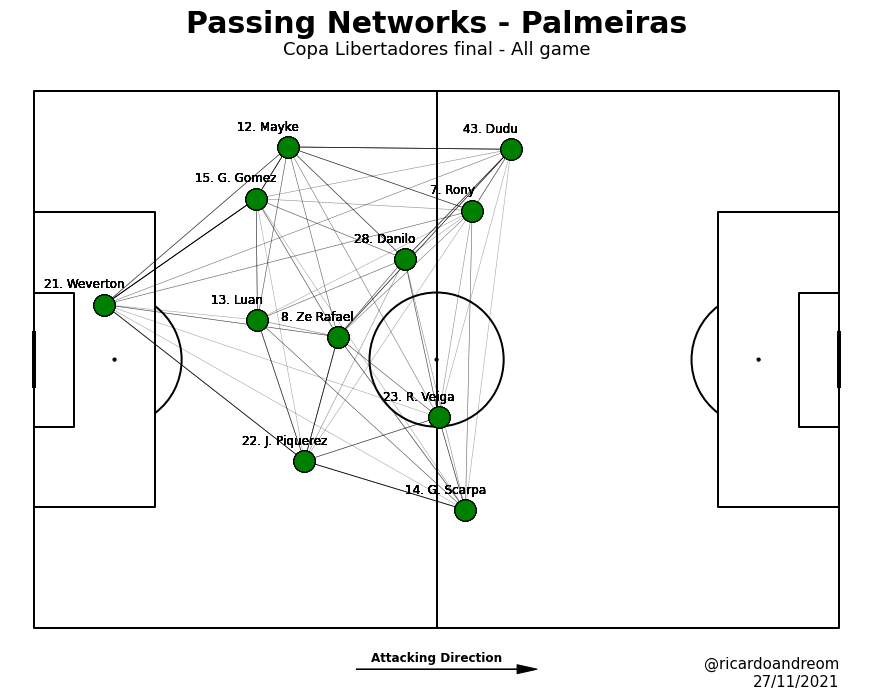

In [84]:
import matplotlib.pyplot as plt
#!pip install mplsoccer
from mplsoccer import Pitch
from matplotlib.colors import to_rgba

MIN_TRANSPARENCY = 0.3
color = np.array(to_rgba('black'))
color = np.tile(color, (len(df), 1))
c_transparency = df.Passes / df.Passes.max()
c_transparency = (c_transparency * (1 - MIN_TRANSPARENCY)) + MIN_TRANSPARENCY
color[:, 3] = c_transparency

pitch = Pitch(pitch_type='statsbomb', pitch_color='white', line_color='black')
fig, axs = pitch.grid(figheight=10, title_height=0.08, endnote_space=0, axis=False, 
                      title_space=0, grid_height=0.82, endnote_height=0.05)

fig.set_facecolor("white")

pass_lines = pitch.lines(df.x, df.y,
                         df.x_end, df.y_end, lw=df.width+0.5,
                         color=color, zorder=1, ax=axs['pitch'])

pass_nodes = pitch.scatter(df.x, df.y, s=450,
                           color='green', edgecolors='black', linewidth=1, alpha=1, ax=axs['pitch'])

for index, row in df.iterrows():
    pitch.annotate(row.Passador, xy=(row.x-3, row.y-3), c='black', va='center',
                   ha='center', size=12, ax=axs['pitch'])
    
# endnote /title
axs['endnote'].text(1, 0.5, '@ricardoandreom\n27/11/2021', color='black',
                    va='center', ha='right', fontsize=15)

axs['endnote'].text(0.5, 0.9, 'Attacking Direction', va='center', ha='center', color='black', fontsize=12,fontweight='heavy')
axs['endnote'].arrow(0.4, 0.6, 0.2, 0, head_width=0.25, head_length=0.025, ec='black', fc='black')
axs['endnote'].set_xlim(0, 1)
axs['endnote'].set_ylim(0, 1)

axs['title'].text(0.5, 0.7, 'Passing Networks - Palmeiras', color='black',
                  va='center', ha='center', fontsize=30, fontweight='heavy')
axs['title'].text(0.5, 0.25, 'Copa Libertadores final - All game', color='black',
                  va='center', ha='center', fontsize=18)
#plt.savefig('Passing Networks.png', dpi=300, bbox_inches='tight')